In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\Acer\Desktop\dataset\ford.csv")

In [2]:
data.head(4)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5


In [3]:
data.shape

(17965, 9)

In [4]:
data.describe

<bound method NDFrame.describe of          model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17960   Fiesta  2016   7999       Manual    31348   Petrol  125  54.3   
17961    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17963    Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17964       KA  2018   8299       Manual     5007   Petrol  145  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3        

In [5]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [6]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:

skewness = data.skew(numeric_only=True)

print(skewness)

year         -1.282764
price         1.096384
mileage       1.842042
tax          -0.564237
mpg           0.603903
engineSize    1.893066
dtype: float64


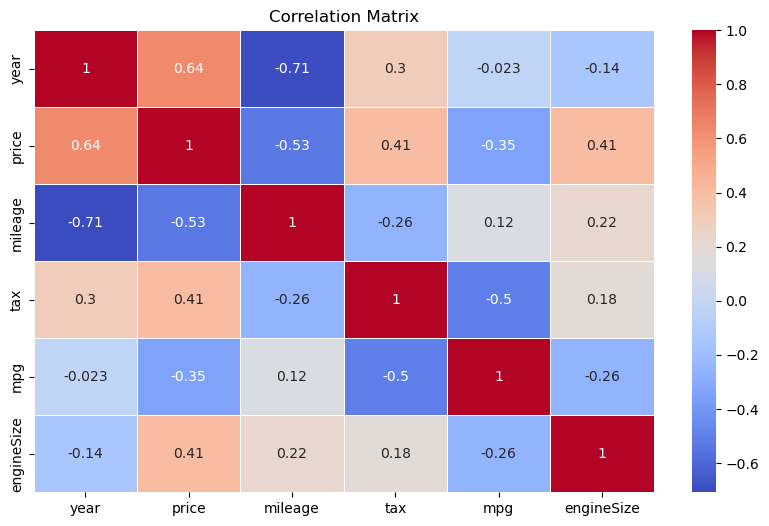

In [8]:
# 1. Draw a correlation matrix for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:

# 2. Find which category has the highest and lowest price sold
high_price_category = data.groupby('model')['price'].max().idxmax()
low_price_category = data.groupby('model')['price'].min().idxmin()
print(f"Model with highest price sold: {high_price_category}")
print(f"Model with lowest price sold: {low_price_category}")

Model with highest price sold:  Focus
Model with lowest price sold:  Focus


In [11]:
# 3. Calculate the average tax price
avg_tax_price = data['tax'].mean()
print(f"Average tax price: {avg_tax_price}")

# 4. Calculate the average miles per gallon (mpg) for each model type
avg_mpg_per_model = data.groupby('model')['mpg'].mean()
print("Average mpg for each model type:")
print(avg_mpg_per_model)

# 5. Top 5 years with the highest selling of cars by price
top_5_years = data.groupby('year')['price'].sum().nlargest(5)
print("Top 5 years with the highest selling of cars by price:")
print(top_5_years)

Average tax price: 113.33453938213192
Average mpg for each model type:
model
 B-MAX                    55.678592
 C-MAX                    59.508840
 EcoSport                 53.093526
 Edge                     46.150962
 Escort                   34.400000
 Fiesta                   60.977429
 Focus                    60.089385
 Fusion                   45.393750
 Galaxy                   53.347807
 Grand C-MAX              58.367206
 Grand Tourneo Connect    60.172881
 KA                       56.092462
 Ka+                      53.329755
 Kuga                     51.677528
 Mondeo                   60.034030
 Mustang                  24.271930
 Puma                     50.136250
 Ranger                   28.300000
 S-MAX                    51.907432
 Streetka                 35.550000
 Tourneo Connect          58.148485
 Tourneo Custom           38.611594
 Transit Tourneo          42.200000
Name: mpg, dtype: float64
Top 5 years with the highest selling of cars by price:
year
2017    5

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables (model, transmission, fuelType)
le_model = LabelEncoder()
le_transmission = LabelEncoder()
le_fuelType = LabelEncoder()

data['model'] = le_model.fit_transform(data['model'])
data['transmission'] = le_transmission.fit_transform(data['transmission'])
data['fuelType'] = le_fuelType.fit_transform(data['fuelType'])

# Define features (X) and target (y)
X = data.drop('price', axis=1)
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 864.499596725676
Mean Squared Error: 1594357.3394201514
R-squared: 0.9287544246467813


In [32]:

new_car_model = 'Focus'
if new_car_model in le_model.classes_:
    encoded_model = le_model.transform([new_car_model])[0]
else:
    # Handle unseen category by assigning a default or new value (here, 0)
    encoded_model = 0  # or any other logic you prefer

C:\Users\Acer\AppData\Local\Temp\ipykernel_7884\3322494411.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if new_car_model in le_model.classes_:


In [33]:

new_transmission = 'Manual'
if new_transmission in le_transmission.classes_:
    encoded_transmission = le_transmission.transform([new_transmission])[0]
else:
    encoded_transmission = 0  # Handle unseen transmission similarly

new_fuelType = 'Petrol'
if new_fuelType in le_fuelType.classes_:
    encoded_fuelType = le_fuelType.transform([new_fuelType])[0]
else:
    encoded_fuelType = 0 

C:\Users\Acer\AppData\Local\Temp\ipykernel_7884\3227688612.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if new_transmission in le_transmission.classes_:
C:\Users\Acer\AppData\Local\Temp\ipykernel_7884\3227688612.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if new_fuelType in le_fuelType.classes_:


In [34]:
new_data = pd.DataFrame({
    'model': [encoded_model],
    'year': [2019],
    'transmission': [encoded_transmission],
    'mileage': [10000],
    'fuelType': [encoded_fuelType],
    'tax': [150],
    'mpg': [57.7],
    'engineSize': [1.0]
})

new_price_prediction = model.predict(new_data)
print(f"Predicted Price: {new_price_prediction[0]}")

Predicted Price: 14502.825833333334
